In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Goal: Testing Price's Law using NBA statistics
Price's well-known square root law states that half of the literature on a subject will be contributed by the square root of the total number of authors publishing in that area. It was specific to academic journals, but has been generalized to "The square root of the number of people in a domain do 50% of the work". The objective of this analysis is to do a case study of NBA statistics for the 2018-2019 regular season to see whether statistics are consistent with this generally accepted principle. 

#### Method
To assess the relevance of this principle in the NBA, I look at 14 categories. One category, minutes played, represents the opportunity to produce, while the remaining categories represent actual production. Production is defined across 13 categories including points scores, field goals made, three pointers made, free throws made, rebounds, steals , assists, and blocks.

#### Data Source: NBA.com

#### Glossary
GP Games Played, MIN Minutes Played, PTS Points, FGM Field Goals Made, FGA Field Goals Attempted, FG% Field Goal Percentage, 3PM 3 Point Field Goals Made, 3PA 3 Point Field Goals Attempted, 3P% 3 Point Field Goals Percentage, FTM Free Throws Made, FTA Free Throws Attempted, FT% Free Throw Percentage, OREB Offensive Rebounds, DREB Defensive Rebounds, REB Rebounds, AST Assists, STL Steals, BLK Blocks

In [13]:
# Generalized scaling of Price's Law
samples = np.arange(100,1001,100)
price = np.round_(np.sqrt(samples),0)
remainder = samples - price
print(samples)
print(price)
print(remainder)

[ 100  200  300  400  500  600  700  800  900 1000]
[10. 14. 17. 20. 22. 24. 26. 28. 30. 32.]
[ 90. 186. 283. 380. 478. 576. 674. 772. 870. 968.]


In [34]:
player_df = pd.read_csv('NBA_Player_Stats.csv')
player_df.head()

,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF
0,James Harden,78,2867,2818,843,1909,44.2,378,1028,36.8,...,87.9,66,452,518,586,158,58,387,244,2581
1,Paul George,77,2841,2159,707,1614,43.8,292,757,38.6,...,83.9,105,523,628,318,170,34,205,214,2110
2,Kemba Walker,82,2863,2102,731,1684,43.4,260,731,35.6,...,84.4,52,309,361,484,102,34,211,131,1849
3,Bradley Beal,82,3028,2099,764,1609,47.5,209,596,35.1,...,80.8,89,322,411,448,121,58,224,226,1982
4,Damian Lillard,80,2838,2067,681,1533,44.4,237,643,36.9,...,91.2,68,303,371,551,88,34,212,148,2002


In [35]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 22 columns):
PLAYER    530 non-null object
GP        530 non-null int64
MIN       530 non-null int64
PTS       530 non-null int64
FGM       530 non-null int64
FGA       530 non-null int64
FG%       530 non-null float64
3PM       530 non-null int64
3PA       530 non-null int64
3P%       530 non-null float64
FTM       530 non-null int64
FTA       530 non-null int64
FT%       530 non-null float64
OREB      530 non-null int64
DREB      530 non-null int64
REB       530 non-null int64
AST       530 non-null int64
STL       530 non-null int64
BLK       530 non-null int64
TOV       530 non-null int64
PF        530 non-null int64
EFF       530 non-null int64
dtypes: float64(3), int64(18), object(1)
memory usage: 91.2+ KB


In [7]:
team_df = pd.read_csv('NBA_Team_Stats.csv')
team_df.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Washington Wizards,82,32,50,0.390,3986,9350,3456,7387,46.8,...,2679,3473,2154,1154,683,379,378,1701,1741,-238
1,Utah Jazz,82,50,32,0.610,3951,9161,3314,7082,46.8,...,2981,3801,2133,1240,663,483,376,1728,1835,431
2,Toronto Raptors,82,58,24,0.707,3976,9384,3460,7305,47.4,...,2920,3706,2085,1150,680,437,368,1724,1683,499
3,San Antonio Spurs,82,48,34,0.585,3961,9156,3468,7248,47.8,...,2910,3667,2013,992,501,386,332,1487,1611,138
4,Sacramento Kings,82,39,43,0.476,3946,9363,3541,7637,46.4,...,2819,3725,2083,1095,679,363,420,1751,1753,-92


In [8]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 27 columns):
TEAM    30 non-null object
GP      30 non-null int64
W       30 non-null int64
L       30 non-null int64
WIN%    30 non-null float64
MIN     30 non-null int64
PTS     30 non-null int64
FGM     30 non-null int64
FGA     30 non-null int64
FG%     30 non-null float64
3PM     30 non-null int64
3PA     30 non-null int64
3P%     30 non-null float64
FTM     30 non-null int64
FTA     30 non-null int64
FT%     30 non-null float64
OREB    30 non-null int64
DREB    30 non-null int64
REB     30 non-null int64
AST     30 non-null int64
TOV     30 non-null int64
STL     30 non-null int64
BLK     30 non-null int64
BLKA    30 non-null int64
PF      30 non-null int64
PFD     30 non-null int64
+/-     30 non-null int64
dtypes: float64(4), int64(22), object(1)
memory usage: 6.5+ KB


In [36]:
# There are 30 teams each with a max 15 player roster during the regular season. This results in ~450 players on a roster
# at any given time. However, there are 530 players in this data set, so I will use 530 as the total players in the 2018-19
# season. The difference is there are players who get cut or recruited throughout the season.
# The square root is 23 players
players = 530
threshold = round(np.sqrt(players),0)
threshold

23.0

In [27]:
def price_law(col):
    total = team_df[col].sum()
    half = 0
    n_players = 0

    for index, stat in enumerate(player_df[col].sort_values(ascending=False)):
        if half < 0.5*total:
            half += stat
            n_players = index
            contribution = round(half/total,3)

    return half, n_players, contribution

In [37]:
price_law('MIN')

(59753, 21, 0.503)

In [38]:
categories = ['MIN', 'PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK']

In [39]:
price_law('PTS') #test on points

(137633, 103, 0.503)

In [59]:
def iterator(func):
    n_players = []
    contribution = []
    for category in categories:
        half, num, cont = func(category)
        n_players.append(num)
        contribution.append(cont)

    return n_players, contribution, categories

n_players, contribution, categories = iterator(price_law)
    

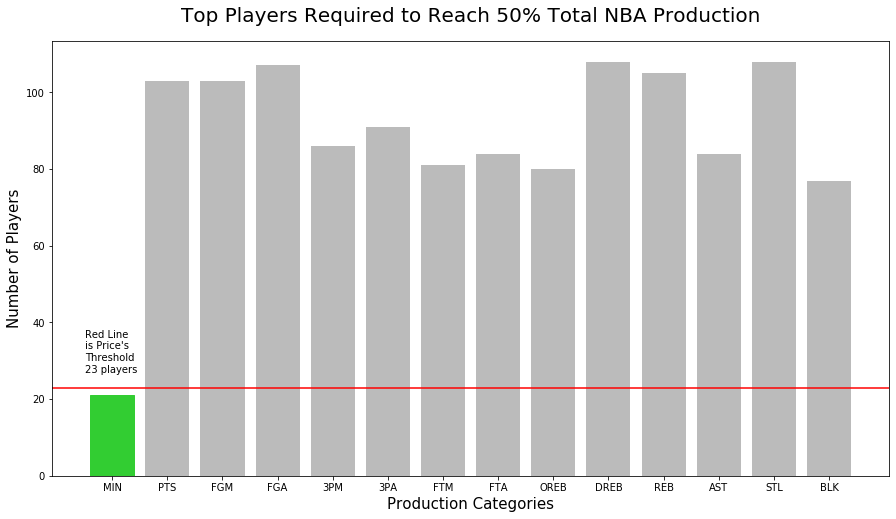

In [114]:
fig = plt.figure(figsize=(15,8))
_=plt.bar(categories, n_players, color='#bbbbbb')
_[0].set_color('#32cd32')
_=plt.axhline(y=threshold, c='red')
_=plt.title('Top Players Required to Reach 50% Total NBA Production', y=1.03, fontsize=20)
_=plt.xlabel('Production Categories', fontsize=15)
_=plt.ylabel('Number of Players', fontsize=15)
_=plt.annotate(s='Red Line\nis Price\'s\nThreshold\n23 players', xy=[-0.5,27])

While opportunity to produce seems to follow Price's Law (less than a square root of the total players monopolize half the minutes played), actual production fall short.Typically, it take between 80 and 100 of the top players ranked in descending order by statistical category to product half the results.

In [54]:
def empirical(col):
    total = team_df[col].sum()
    stats = 0
    n_players = 0

    for index, stat in enumerate(player_df[col].sort_values(ascending=False)):
        if n_players < threshold:
            stats += stat
            n_players += 1
            contribution = round(stats/total,3)

    return stats, n_players, contribution

In [56]:
empirical('PTS') #test on points

(42791, 23, 0.156)

In [65]:
num_players, real_contribution, categories = iterator(empirical)

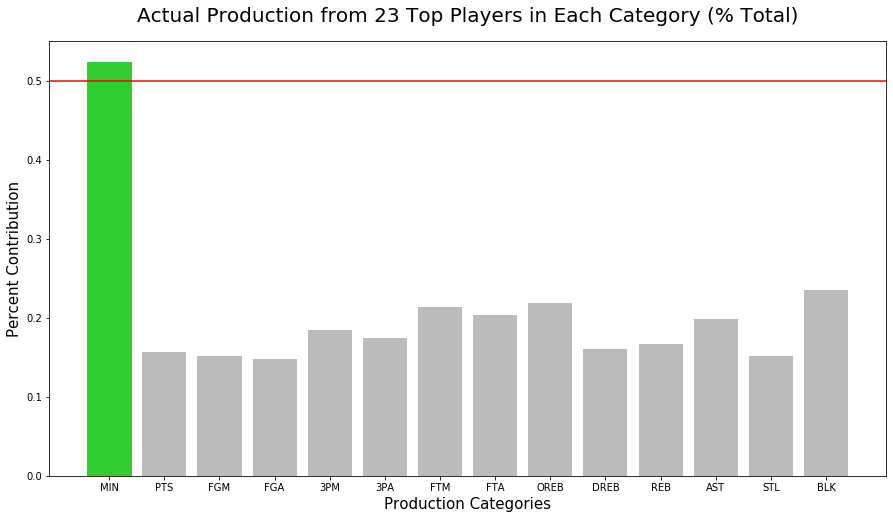

In [113]:
fig = plt.figure(figsize=(15,8))
_= plt.bar(categories, real_contribution, color='#bbbbbb')
_[0].set_color('#32cd32')
_=plt.axhline(y=0.50, c='red')
_=plt.title('Actual Production from 23 Top Players in Each Category (% Total)', y=1.03, fontsize=20)
_=plt.xlabel('Production Categories', fontsize=15)
_=plt.ylabel('Percent Contribution', fontsize=15)

Again, the chart shows that the 23 top players account for over 50% of total minutes. However, the percent contribution from the top 23 players across each category ranges from 15-23 percent, well short of half.

In [103]:
pc_contributing_half = np.array(n_players)/players
pc_contributing_half

array([0.03962264, 0.19433962, 0.19433962, 0.20188679, 0.16226415,
       0.17169811, 0.15283019, 0.15849057, 0.1509434 , 0.20377358,
       0.19811321, 0.15849057, 0.20377358, 0.14528302])

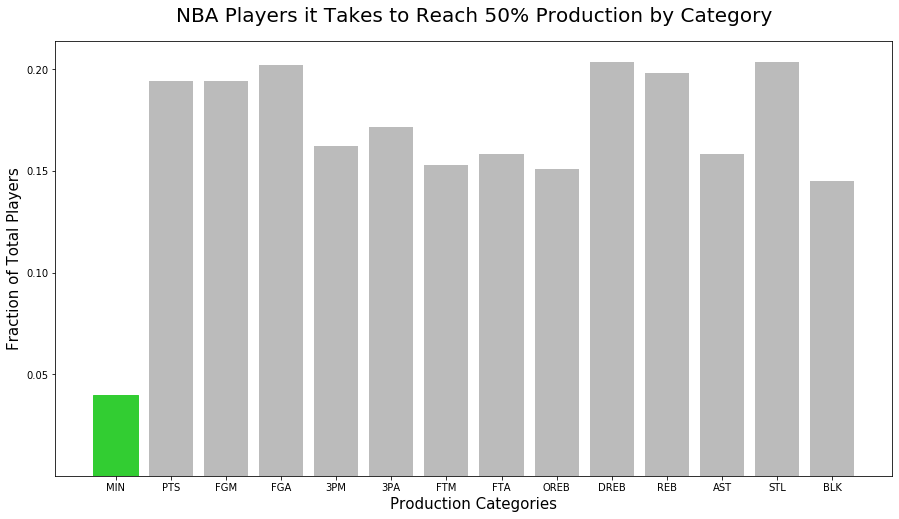

In [112]:
fig = plt.figure(figsize=(15,8))
_= plt.bar(categories, pc_contributing_half, color='#bbbbbb')
_[0].set_color('#32cd32')
_=plt.title('NBA Players it Takes to Reach 50% Production by Category', y=1.03, fontsize=20)
_=plt.xlabel('Production Categories', fontsize=15)
_=plt.ylabel('Fraction of Total Players', fontsize=15)
_=plt.yticks([0.05, 0.10, 0.15, 0.20])

Still, there is a relationship that is similar to Price's Law in that the top players contribute the majority of production. What's striking is that less than 4% of players monopolize half the minutes. Across all production categories, the top 15-20% of players contribute half of all production.